Biblioteki

In [200]:
import random
import numpy as np
import matplotlib.pyplot as plt

Funkcje do optymalizacji

In [201]:
def sphere_function(x):
    return sum([xi**2 for xi in x])

In [202]:
def ackley_function(x):
    d = len(x)
    sum1 = sum(x**2 for x in x)
    sum2 = sum(np.cos(2 * np.pi * x) for x in x)
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * sum1)) - np.exp(0.5 * sum2) + np.e + 20

In [203]:
def schwefel_function(x):
    return -np.sum(x * np.sin(np.sqrt(np.abs(x))))

In [204]:
def levy_function(x):
    d = len(x)
    w = [1 + (x[i] - 1) / 4 for i in range(d)]
    term1 = (np.sin(np.pi * w[0])) ** 2
    term2 = sum([(w[i] - 1) ** 2 * (1 + 10 * (np.sin(np.pi * w[i] + 1)) ** 2) for i in range(d - 1)])
    term3 = (w[d - 1] - 1) ** 2 * (1 + (np.sin(2 * np.pi * w[d - 1])) ** 2)
    return term1 + term2 + term3

In [205]:
def perm_function(x, beta=10):
    result = sum((i * (arg ** 2) ** beta) for i, arg in enumerate(x, start=1))
    return result

Funkcja inicjalizacji populacji

In [206]:
def initialize_population(pop_size, dim):
    return [[random.uniform(-5.12, 5.12) for _ in range(dim)] for _ in range(pop_size)]

Funkcja Oceny osobników

In [207]:
def fitness_function(individual, func_name):
    if func_name == 'sphere_function':
        return sphere_function(individual)
    elif func_name == 'ackley_function':
        return ackley_function(individual)
    elif func_name == 'schwefel_function':
        return schwefel_function(individual)
    elif func_name == 'levy_function':
        return levy_function(individual)
    elif func_name == 'perm_function':
        return perm_function(individual)

Funkcja selekcji turniejowa

In [208]:
def tournament_selection(population, fitness_scores, tournament_size):
    selected_individuals = []
    for _ in range(len(population)):
        tournament_indices = random.sample(range(len(population)), tournament_size)
        
        tournament_fitness_scores = [fitness_scores[i] for i in tournament_indices]

        winner_index = tournament_indices[np.argmin(tournament_fitness_scores)] # index wygranego poszczególnego turnieju

        selected_individuals.append(population[winner_index]) # gotowa lista wygranych turniejów

    return selected_individuals

Funkcja krzyżowania

In [209]:
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

Funkcja mutacji

In [210]:
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

Funkcja algorytmu ewolucji

In [211]:
def evolutionary_algorithm(pop_size, dim, func_name, tournament_size, num_generations, mutation_rate):
    population = initialize_population(pop_size, dim)
    history = [population.copy()]  # Historia populacji dla wizualizacji
    for _ in range(num_generations):
        fitness_scores = [fitness_function(individual, func_name) for individual in population]

        new_population = []
        selected_individuals = tournament_selection(population, fitness_scores, tournament_size)
        for _ in range(pop_size // 2):
            parent1, parent2 = random.choices(selected_individuals, k=2)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])

        population = new_population
        history.append(population.copy())  # Dodanie nowego pokolenia do historii populacji

    best_individual = min(population, key=lambda x: fitness_function(x, func_name))
    return best_individual, fitness_function(best_individual, func_name), history

Funkcja algorytmu ewolucji różnicowej*

In [212]:
def differential_evolution(pop_size, dim, func_name, num_generations, mutation_factor, crossover_rate):
    population = initialize_population(pop_size, dim)
    history = [population.copy()]  # Historia populacji dla wizualizacji
    for _ in range(num_generations):
        for i in range(pop_size):
            target_vector = population[i]
            indices = [idx for idx in range(pop_size) if idx != i]
            a, b, c = random.sample(indices, 3)
            donor_vector = np.add(population[a], mutation_factor * (np.subtract(population[b], population[c])))
            crossed_vector = []
            for j in range(dim):
                if random.random() < crossover_rate or j == random.randint(0, dim - 1):
                    crossed_vector.append(donor_vector[j])
                else:
                    crossed_vector.append(target_vector[j])
            if fitness_function(crossed_vector, func_name) < fitness_function(target_vector, func_name):
                population[i] = crossed_vector
        history.append(population.copy())  # Dodanie nowego pokolenia do historii populacji
    best_individual = min(population, key=lambda x: fitness_function(x, func_name))
    return best_individual, fitness_function(best_individual, func_name), history

Main

In [225]:
random.seed(1234)
pop_size = 100  # rozmiar populacji
dim = 3
# random.randint(3, 49) # wymiary
func_dict = {1: 'sphere_function', 2: 'ackley_function', 3: 'schwefel_function', 4: 'levy_function', 5: 'perm_function'}
func_name = "ackley_function" # wybor funkcji do optymalizacji
tournament_size = 5
num_generations = 10
mutation_rate = 0.01
mutation_factor = 0.5
crossover_rate = 0.7

Wywołanie funkcji

In [214]:
best_solution, best_fitness, history = evolutionary_algorithm(pop_size, dim, func_name, tournament_size, num_generations, mutation_rate)
print("Najlepsze rozwiązanie:", best_solution)
print("Wartość funkcji celu dla najlepszego rozwiązania:", best_fitness)

Najlepsze rozwiązanie: [0.00530222 0.49792591 0.15651054]
Wartość funkcji celu dla najlepszego rozwiązania: 0.27245387652832864


In [215]:
best_solution, best_fitness, history2 = differential_evolution(pop_size, dim, func_name, num_generations, mutation_factor, crossover_rate)
print("Najlepsze rozwiązanie:", best_solution)
print("Wartość funkcji celu dla najlepszego rozwiązania:", best_fitness)

Najlepsze rozwiązanie: [0.12247562827421177, 0.07808483258904086, -0.020934452907831524]
Wartość funkcji celu dla najlepszego rozwiązania: 0.021535771920171653


Wizualizacja

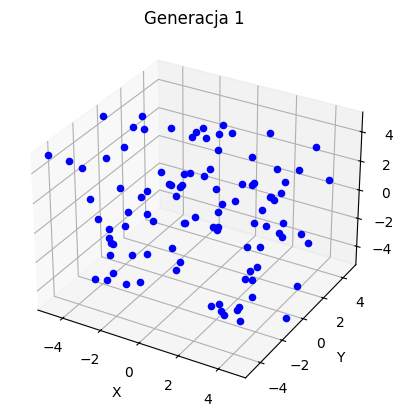

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for generation, population in enumerate(history):
    ax.clear()
    ax.set_title(f"Generacja {generation + 1}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_zlim(-5.12, 5.12)
    for individual in population:
        ax.scatter(individual[0], individual[1], individual[2], color='b', marker='o')
    
    best_solution_fitness = fitness_function(best_solution, func_name)
    for individual in population:
        if fitness_function(individual, func_name) == best_solution_fitness:
            ax.scatter(individual[0], individual[1], individual[2], color='r', marker='o')

    plt.pause(0.5)

plt.show()

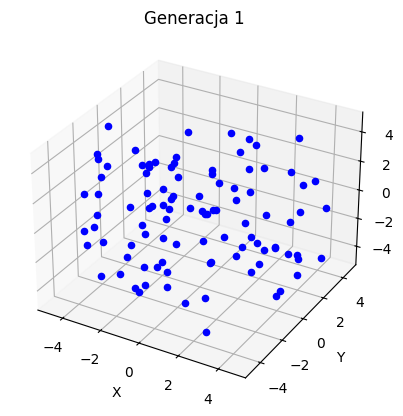

In [217]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for generation, population in enumerate(history2):
    ax.clear()
    ax.set_title(f"Generacja {generation + 1}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_zlim(-5.12, 5.12)
    for individual in population:
        ax.scatter(individual[0], individual[1], individual[2], color='b', marker='o')
    
    best_solution_fitness = fitness_function(best_solution, func_name)
    for individual in population:
        if fitness_function(individual, func_name) == best_solution_fitness:
            ax.scatter(individual[0], individual[1], individual[2], color='r', marker='o')

    plt.pause(0.5)

plt.show()

Te same funkcje natomiast mają dodane liczenie Best, avg i worst

In [218]:
def evolutionary_algorithm(pop_size, dim, func_name, tournament_size, num_generations, mutation_rate):
    population = initialize_population(pop_size, dim)
    best_solutions = []
    avg_solutions = []
    worst_solutions = []

    for generation in range(num_generations):
        fitness_scores = [fitness_function(individual, func_name) for individual in population]

        best_solution = min(population, key=lambda x: fitness_function(x, func_name))
        avg_solution = sum(fitness_scores) / len(population)
        worst_solution = max(population, key=lambda x: fitness_function(x, func_name))

        best_solutions.append(fitness_function(best_solution, func_name))
        avg_solutions.append(avg_solution)
        worst_solutions.append(fitness_function(worst_solution, func_name))

        new_population = []
        selected_individuals = tournament_selection(population, fitness_scores, tournament_size)
        for _ in range(pop_size // 2):
            parent1, parent2 = random.choices(selected_individuals, k=2)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])

        population = new_population

    return best_solutions, avg_solutions, worst_solutions

In [219]:
def differential_evolution(pop_size, dim, func_name, num_generations, mutation_factor, crossover_rate):
    population = initialize_population(pop_size, dim)
    best_solutions = []
    avg_solutions = []
    worst_solutions = []

    for generation in range(num_generations):
        fitness_scores = [fitness_function(individual, func_name) for individual in population]

        best_solution = min(population, key=lambda x: fitness_function(x, func_name))
        avg_solution = sum(fitness_scores) / len(population)
        worst_solution = max(population, key=lambda x: fitness_function(x, func_name))

        best_solutions.append(fitness_function(best_solution, func_name))
        avg_solutions.append(avg_solution)
        worst_solutions.append(fitness_function(worst_solution, func_name))

        for i in range(pop_size):
            target_vector = population[i]
            indices = [idx for idx in range(pop_size) if idx != i]
            a, b, c = random.sample(indices, 3)
            donor_vector = np.add(population[a], mutation_factor * (np.subtract(population[b], population[c])))
            crossed_vector = []
            for j in range(dim):
                if random.random() < crossover_rate or j == random.randint(0, dim - 1):
                    crossed_vector.append(donor_vector[j])
                else:
                    crossed_vector.append(target_vector[j])
            if fitness_function(crossed_vector, func_name) < fitness_function(target_vector, func_name):
                population[i] = crossed_vector

    return best_solutions, avg_solutions, worst_solutions

Wywołanie ich

In [226]:
best_solutions_ae, avg_solutions_ae, worst_solutions_ae = evolutionary_algorithm(pop_size, dim, func_name, tournament_size, num_generations, mutation_rate)

best_solutions_de, avg_solutions_de, worst_solutions_de = differential_evolution(pop_size, dim, func_name, num_generations, mutation_factor, crossover_rate)

generations = range(1, num_generations + 1)

Wizualizacja

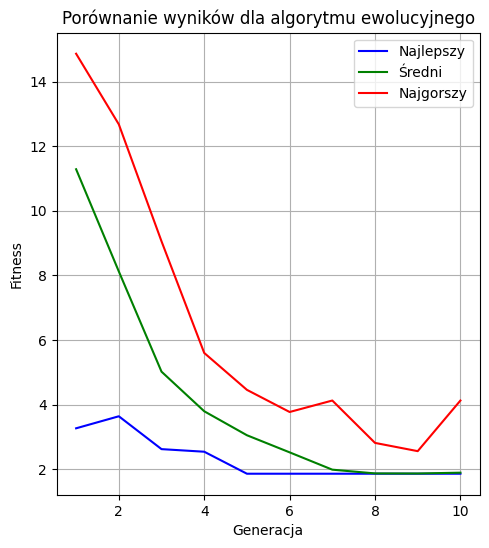

In [227]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.plot(generations, best_solutions_ae, label='Najlepszy', color='blue')
plt.plot(generations, avg_solutions_ae, label='Średni', color='green')
plt.plot(generations, worst_solutions_ae, label='Najgorszy', color='red')

plt.title('Porównanie wyników dla algorytmu ewolucyjnego')
plt.xlabel('Generacja')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)

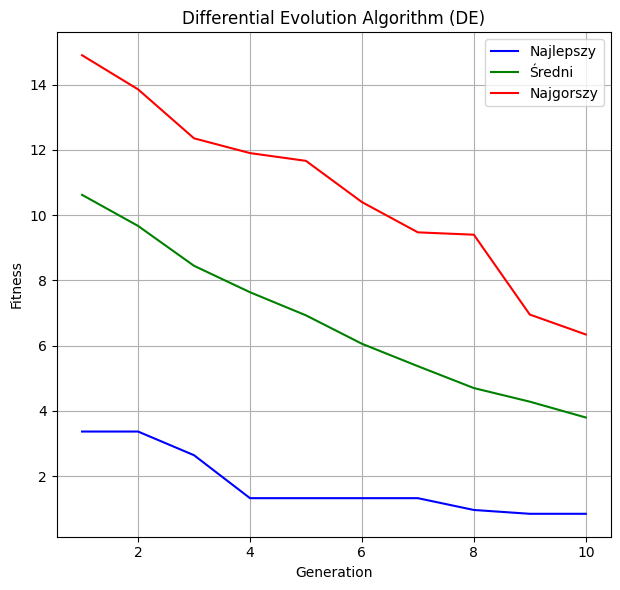

In [228]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)

plt.plot(generations, best_solutions_de, label='Najlepszy', color='blue')
plt.plot(generations, avg_solutions_de, label='Średni', color='green')
plt.plot(generations, worst_solutions_de, label='Najgorszy', color='red')

plt.title('Differential Evolution Algorithm (DE)')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()